<a href="https://colab.research.google.com/github/mmistroni/OpenBB_Experiments/blob/main/OpenBBFinancialAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing the OpenBB Platform in Google Colab

This notebook will install the OpenBB Platform, fetch some data and prepare it for display as a bar chart.

Sign up for a free account here: https://my.openbb.co

In [1]:
# Install the OpenBB Platform with all available extensions.
# Messages indicating package version conflicts at the end of installation can be safely ignored.

!pip install openbb[all]

# There is also a nightly distribution available, openbb-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.5/95.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.6 MB/s eta 0:00

In [1]:
# Before running this cell, restart the runtime by selecting, "Restart runtime", from the "Runtime" menu.

# Import statements - for many scenarios, the only import needed will be `from openbb import obb`
from typing import Literal
from IPython.display import display
from IPython.display import clear_output
import ipywidgets as widgets
import pandas as pd
import pandas_ta as ta
from datetime import datetime , date
from plotly import graph_objects as go

from openbb import obb

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


Extensions to add: technical@1.1.3, news@1.1.2, equity@1.1.2, crypto@1.1.2, fred@1.1.2, oecd@1.1.2, currency@1.1.2, wsj@1.1.2, tiingo@1.1.2, benzinga@1.1.2, federal_reserve@1.1.2, quantitative@1.1.2, derivatives@1.1.2, polygon@1.1.2, ecb@1.1.2, regulators@1.1.2, alpha_vantage@1.1.2, etf@1.1.2, tradingeconomics@1.1.2, fmp@1.1.2, cboe@1.1.2, nasdaq@1.1.3, fixedincome@1.1.2, sec@1.1.2, economy@1.1.2, intrinio@1.1.2, biztoc@1.1.2, index@1.1.2, finviz@1.0.1, finra@1.1.2, stockgrid@1.1.2, seeking_alpha@1.1.2, yfinance@1.1.2, government_us@1.1.2, econometrics@1.1.2
Extensions to remove: economy@1.1.1, tiingo@1.1.1, polygon@1.1.1, fred@1.1.1, regulators@1.1.1, etf@1.1.1, federal_reserve@1.1.1, fixedincome@1.1.1, benzinga@1.1.1, equity@1.1.1, crypto@1.1.1, derivatives@1.1.1, fmp@1.1.1, news@1.1.1, yfinance@1.1.1, oecd@1.1.1, currency@1.1.1, index@1.1.1, sec@1.1.1, tradingeconomics@1.1.1, intrinio@1.1.1

Building...


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

def get_openbb_keys():
  with open('gdrive/My Drive/passwords/openbb.keys') as f:
    return f.readlines()[0]

def get_benzinga_keys():
  with open('gdrive/My Drive/passwords/benzinga.keys') as f:
    return f.readlines()[0]

def get_intrinio_keys():
  with open('gdrive/My Drive/passwords/intrinio.keys') as f:
    return f.readlines()[0]

def getfmpkeys():
  with open('gdrive/My Drive/passwords/fmprep.keys') as f:
    return f.readlines()[0]


Mounted at /content/gdrive


In [3]:
# Login to OpenBB Hub to retrieve stored API keys.
# https://my.openbb.co/app/platform/pat
# https://my.openbb.co/app/platform/api-keys

obb.account.login(pat=get_openbb_keys())

In [4]:
obb.user.credentials.benzinga_api_key=get_benzinga_keys()
obb.user.credentials.intrinio_api_key=get_intrinio_keys()

In [5]:
# Verify that the credentials from Hub were loaded successfully.


obb.user.preferences.output_type = "dataframe"
obb.user.credentials

Credentials

alpha_vantage_api_key: None
benzinga_api_key: **********
biztoc_api_key: None
fmp_api_key: **********
fred_api_key: **********
intrinio_api_key: **********
nasdaq_api_key: None
polygon_api_key: None
tiingo_token: None
tradingeconomics_api_key: None

### Defining Tickers for Analysis


In [6]:
# Set the output preference, if desired. The examples below use Pandas DataFrames.
from datetime import timedelta
from dateutil.relativedelta import relativedelta
TICKER = 'DIS'
TICKER2 = '^GSPC' # S&P500
SECTOR_TICKER = 'XLY'
INDUSTRY_TICKER = 'XME'
startDate = date.today() - relativedelta(years=5)

### Return Comparison

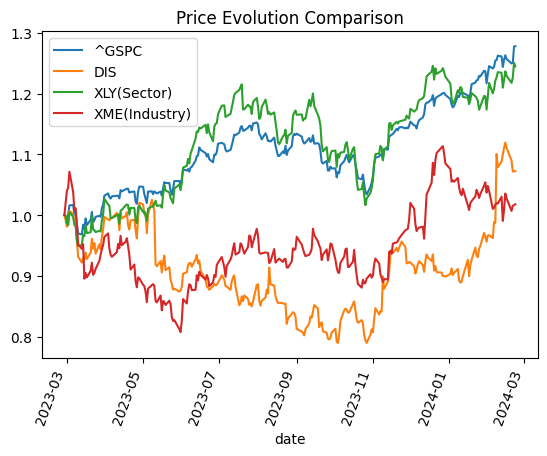

In [7]:
obb.equity.price.historical(symbol = 'AAPL', provider='fmp')
import matplotlib.pyplot as plt
spy = obb.equity.price.historical(symbol = TICKER2, provider='fmp')[['close']].rename(columns={'close' : TICKER2})
dis = obb.equity.price.historical(symbol = TICKER, provider='fmp')[['close']].rename(columns={'close' : TICKER})
sector = obb.equity.price.historical(symbol = SECTOR_TICKER, provider='fmp')[['close']].rename(columns={'close' : SECTOR_TICKER})
industry = obb.equity.price.historical(symbol = INDUSTRY_TICKER, provider='fmp')[['close']].rename(columns={'close' : INDUSTRY_TICKER})

one = pd.merge(spy, dis, left_index=True, right_index=True)
two = pd.merge(one, sector,left_index=True, right_index=True)
result = pd.merge(two, industry,left_index=True, right_index=True)
histpriceconcat = result/result.iloc[0]


for i, col in enumerate([TICKER2, TICKER, SECTOR_TICKER, INDUSTRY_TICKER]):
    histpriceconcat[col].plot()

plt.title('Price Evolution Comparison')
plt.xticks(rotation=70)

legendCols = [TICKER2, TICKER, f'{SECTOR_TICKER}(Sector)', f'{INDUSTRY_TICKER}(Industry)']

plt.legend(legendCols)
#plt.savefig('foo1.png', bbox_inches='tight')
#
plt.show()


### Overview

In [ ]:
obb.equity.fundamental.overview(symbol=TICKER)

### Stock Peers

In [ ]:
import os
import requests

def get_peers(ticker):
    apiKey = getfmpkeys()
    baseUrl = f'https://financialmodelingprep.com/api/v4/stock_peers?symbol={ticker}&apikey={apiKey}'
    return requests.get(baseUrl).json()[0].get('peersList', [])

full_tickers = obb.equity.compare.peers(symbol=TICKER)[1].values.tolist()[0]
full_tickers

### Generate comparative measures


### Ratios Overview

In [ ]:
liq_ratios = ['current_ratio', 'quick_ratio', 'operating_cash_flow_per_share',  'days_of_sales_outstanding' ]
solvency_ratios = ['interest_coverage', 'debt_ratio',  'debt_equity_ratio'] #missing shareholder equity ratio
profitability_ratios = ['gross_profit_margin', 'operating_profit_margin',
                        #revenuePerShare
                        'pretax_profit_margin',
                        'net_profit_margin',
                        #Cash flow margin
                        'return_on_assets',
                        'return_on_equity',
                        'return_on_capital_employed',
                         #'price_to_sales_ratio'
                         ]

In [ ]:
annual_ratios = obb.equity.fundamental.ratios(symbol=TICKER, period="annual", limit=5)
quarterly_ratios = obb.equity.fundamental.ratios(symbol=TICKER, period="quarter", limit=12)
quarterly_ratios['key'] = quarterly_ratios.apply(lambda row: f"{row['fiscal_period']}_{row['fiscal_year']}", axis=1)
# Income statement. we need this for trajectory of fundamentals
annual_income = obb.equity.fundamental.income(symbol=TICKER, period="annual", limit=5)
quarterly_income = obb.equity.fundamental.income(symbol=TICKER, period="quarter", limit=12)
quarterly_income['key'] = quarterly_ratios.apply(lambda row: f"{row['fiscal_period']}_{row['fiscal_year']}", axis=1)



In [ ]:
annual_liquidity = annual_ratios[liq_ratios + ['fiscal_year'] ].set_index('fiscal_year')
annual_solvency = annual_ratios[solvency_ratios + ['fiscal_year'] ].set_index('fiscal_year')
annual_profitability = annual_ratios[profitability_ratios + ['fiscal_year'] ].set_index('fiscal_year')
quarterly_liquidity = quarterly_ratios[liq_ratios + ['key'] ].set_index('key')
quarterly_solvency = quarterly_ratios[solvency_ratios + ['key'] ].set_index('key')
quarterly_profitability = quarterly_ratios[profitability_ratios + ['key'] ].set_index('key')

annual_income = annual_income.set_index('fiscal_year')
quarterly_income = quarterly_income.set_index('key')


### Liquidity Annnually and Quarterly

In [ ]:
#annual_liquidity
import matplotlib.pyplot as plt

#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2)
annual_liquidity.apply(pd.to_numeric).plot.bar(figsize=(10,8), title='Liquidity Ratios annual', ax=axes[0])
quarterly_liquidity.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Liquidity Ratios qtr', ax=axes[1])

### Profitability

In [ ]:
#annual_liquidity
import matplotlib.pyplot as plt

#define subplot layout
fig, axes = plt.subplots(nrows=2, ncols=1)
annual_profitability.apply(pd.to_numeric).plot.bar(figsize=(20, 10),title='Profitability Ratios annual', ax=axes[0])
quarterly_profitability.apply(pd.to_numeric).plot.bar(figsize=(20,10), title='Profitability Ratios qtr', ax=axes[1])

### Solvency

In [ ]:
import matplotlib.pyplot as plt

#define subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2)
annual_solvency.apply(pd.to_numeric).plot.bar(figsize=(10,8), title='Solvency Ratios annual', ax=axes[0])
quarterly_solvency.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Solvency Ratios qtr', ax=axes[1])

### Now we will resort to the old analysis with Management, Profitability etc that we were used to do in colab

## Now Using other measures before checking financial statements in details

* Gross Profit Margin: Indicates how efficiently a company produces goods or

services by measuring the difference between revenue and the cost of goods sold (COGS).
* Net Profit Margin: Measures a company’s overall profitability by calculating the percentage of net income relative to revenue.
* Return on Assets (ROA): Assesses a company’s ability to generate profits from its assets, calculated by dividing net income by total assets.
* Return on Equity (ROE): Evaluates a company’s ability to generate returns for its shareholders by dividing net income by shareholders’ equity.
* Operating Profit Margin: Shows a company’s operating efficiency by measuring operating income as a percentage of revenue.



## TODO. follow https://colab.research.google.com/drive/1ZdGLqEfAXfiseahjIwxlRXgQbPg3-5Ol#scrollTo=LArvBJ9Qs9a2
COMPARE Across years

- check asset value (total assets, total liabilities, outstading shares, NAV
- compar across years priceearningration, priceearningtogrowthratio, earningyield
- net income, operating cf, capital expenditure, free cf, cashand cash equiv, year of cash


We are looking for htis

<ul>
    <li><b>Staying power</b>: You want to make sure a company has the financial resources to endure a downturn and come out on the other side.<li>
    <li><b>The trajectory of the fundamentals</b>: Because a stock price, over time, is connected to a company’s revenue and earnings, fundamental analysts try to see improving trends in the company’s revenue and profit. Trend spotting will be discussed at more length in Chapter 17.</li>
    <li><b>Evidence of skilled management</b>: A management team with experience navigating through the ups and downs of a business may give the fundamental analyst more confidence in the company’s future. Skilled managers can protect their company’s business from competition with strong brands, service, or quality.</li>
    <li><b>Valuation</b>: Even if a company is performing poorly, the stock can still be a good investment if the bad news is already reflected in the price. Fundamental analysts spend a great deal of their time comparing a company’s current stock price to its real value, based on what they think it’s worth. You discovered how to use the price-to-earnings ratio, or P-E, as a valuation tool in Chapter 8. In this chapter you’ll find out about the earnings yield. Fundamental analysts also look for good values using the discounted cash-flow model, explored in Chapter 11.</li>
    <li><b>Dividend payments</b>: These seemingly small cash payments can quickly add up and become a significant consideration for a fundamental analyst. Fundamental analysts also use these dividends as a way to measure the attractiveness of some stocks, as will be discussed at the end of this chapter.</li>
    </ul>
In addition, we might want to look at this. (Check what we already fetch from our superperformers loader)

<ol>
    <li>Financial Health:
        <ol>
<li>Revenue Growth Rate: Ideally, a company should have a positive revenue growth rate of at least 5% per year.</li>
<li>Profit Margin: A healthy profit margin varies by industry, but a company with a profit margin of at least 10% is generally considered financially healthy.</li>
<li>Debt-to-Equity Ratio: A ratio of less than 1 indicates that a company is financed more by equity than debt, which is generally considered financially healthy.</li>
<li>Free Cash Flow: A positive free cash flow indicates that a company is generating cash from its operations and is able to invest in growth opportunities.</li>
        </ol>
    </li>
 <li>Competitive Advantage:
    <ol>
<li>Market Share: A company with a market share of at least 20% is generally considered to have a strong competitive advantage in its industry.</li>
<li>Return on Equity: A healthy return on equity varies by industry, but a company with a return on equity of at least 15% is generally considered to have a strong competitive advantage.</li>
<li>Price-to-Earnings Ratio: A company with a price-to-earnings ratio that is lower than its peers may indicate that the company is undervalued and has a strong competitive advantage.</li>
<li>Research and Development (R&D) Spending: A company that invests at least 5% of its revenue in R&D is generally considered to be investing in innovation and maintaining its competitive advantage.</li>
     </ol>
  </li>
  <li>Management Quality:
    <ol>
<li>CEO Tenure: Ideally, a CEO should have been leading the company for at least 3–5 years to demonstrate a track record of success.</li>
<li>Executive Compensation: Executive compensation varies by industry, but excessive compensation may indicate poor management quality.</li>
<li>Employee Turnover Rate: A low employee turnover rate indicates that employees are satisfied and that the management team is effective at retaining talent.</li>
<li>Return on Assets: A healthy return on assets varies by industry, but a company with a return on assets of at least 5% is generally considered to have effective management.  </li>
      </ol>
    </li>
</ol>
    
    

### Fundamental Measures

In [ ]:
skilled_management_measures = ['return_on_assets', 'return_on_equity', 'return_on_capital_employed']
staying_power_measures = idxs = ['return_on_capital_employed', 'current_ratio', 'debt_equity_ratio', 'interest_coverage', 'cash_per_share']
valuation_measures = ['price_earnings_to_growth_ratio', 'price_earnings_ratio']
profitability_measures = ["date", "revenue", "costOfRevenues", "operatingExpenses", # will need to probably get them from net income
              "otherExpenses", "netIncome", "ebitda", "interestExpense", "incomeTaxExpense",
              "operatingIncome"]
financial_rations_measures = ['return_on_equity', 'return_on_capital_employed',"receivablesTurnover",
              "inventoryTurnover", "payablesTurnover", "debt_equity_ratio",
              "current_ratio", "quick_ratio", "cash_ratio", "interest_coverage",
              "priceToBookRatio", "dividendYield", "dividendPayoutRatio", "priceEarningsRatio",
              "priceEarningsToGrowthRatio", "cashPerShare"]

trajectory_of_fundamentals = ['revenue', 'diluted_earnings_per_share', 'consolidated_net_income']
cashflow_measures = ['symbol', 'netIncome', "operatingCashFlow", "capitalExpenditure", "freeCashFlow", "ebtida"]
trend_measures = ['operatingIncome', 'revenues', 'eps', 'dividend']

# Find net asset value

In [ ]:
ratios = obb.equity.fundamental.ratios(symbol=TICKER, period="annual", limit=5)


### Staying Power (annual)

In [ ]:
fig, axes = plt.subplots(2, 2)
print(axes)
staying_power_measures = ['fiscal_year'] + ['return_on_capital_employed', 'current_ratio', 'debt_equity_ratio', 'interest_coverage', 'cash_per_share']
skilled_mgmt_measures = ['fiscal_year'] + skilled_management_measures
valuation_measures = ['fiscal_year'] + valuation_measures
staying_power = annual_ratios[staying_power_measures].set_index('fiscal_year')
skilled_mgmt = annual_ratios[skilled_mgmt_measures].set_index('fiscal_year')
valuation = annual_ratios[valuation_measures].set_index('fiscal_year')
traj_fundamentals = annual_income[trajectory_of_fundamentals]
staying_power.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Staying power', ax=axes[0,0])
skilled_mgmt.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Skilled Mgmt', ax=axes[0,1])
valuation.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Valuation', ax=axes[1,0])
traj_fundamentals.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Traj of Fundamentals', ax=axes[1,1])

### Quarterly

In [ ]:
fig_qtr, qtr_axes = plt.subplots(2, 2)
print(axes)

staying_power_qtr = quarterly_ratios[staying_power_measures].set_index('fiscal_year')
skilled_mgmt_qtr = quarterly_ratios[skilled_mgmt_measures].set_index('fiscal_year')
valuation_qtr = quarterly_ratios[valuation_measures].set_index('fiscal_year')
traj_fundamentals_qtr = quarterly_income[trajectory_of_fundamentals]
staying_power_qtr.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Staying power', ax=qtr_axes[0,0])
skilled_mgmt_qtr.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Skilled Mgmt', ax=qtr_axes[0,1])
valuation_qtr.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Valuation', ax=qtr_axes[1,0])
traj_fundamentals_qtr.apply(pd.to_numeric).plot.bar(figsize=(20,8), title='Traj of Fundamentals', ax=qtr_axes[1,1])

###Dividends Over Time

In [ ]:
df = obb.equity.fundamental.dividends(TICKER)
df['cob'] = pd.to_datetime(df.ex_dividend_date)
df = df.set_index(df.cob)
df[df.index > startDate.strftime('%Y-%m-%d')].plot(x='cob')


### Estimates

In [ ]:
obb.equity.estimates.consensus(symbol=TICKER)

### Discounted cashflow

In [ ]:
ov_df = obb.equity.fundamental.overview(symbol=TICKER)
ov_df[ov_df[0].isin(['dcf', 'dcf_diff'])]

### Splits

In [ ]:
obb.equity.fundamental.historical_splits(TICKER)

### Financial Statement Growth

In [ ]:
obb.equity.fundamental.balance_growth(symbol=TICKER, limit=10)

In [ ]:
obb.equity.fundamental.income_growth(symbol=TICKER, limit=10)

In [ ]:
obb.equity.fundamental.cash_growth(symbol=TICKER, limit=10)

## Comparison With Stock in same sectors

### Historical Market Cap Last 5 yrs

In [ ]:
def get_marketcap_for_ticker(ticker):
  end_date = date.today()
  start_date = date(end_date.year-5, 1, 1)
  fmp_url =  f"https://financialmodelingprep.com/api/v3/historical-market-capitalization/{ticker}?from={start_date.strftime('%Y-%m-%d')}&to={end_date.strftime('%Y-%m-%d')}&apikey={getfmpkeys()}"
  data = requests.get(fmp_url).json()

  df = pd.DataFrame(data)[['date', 'marketCap']]
  df['date'] = pd.to_datetime(df.date)
  df['marketCap'] = df.marketCap / 1000000

  df = df.set_index('date')
  return df.rename(columns={'marketCap' : ticker})

dfs = [get_marketcap_for_ticker(t) for t in full_tickers]

dis = get_marketcap_for_ticker(TICKER)

from functools import reduce

alldata = reduce(lambda df, acc: pd.merge(df, acc, left_index=True, right_index=True), dfs, dis)


alldata.plot(figsize=(20, 8))







### Revenues

In [ ]:
#full_tickers
ratios = ['net_profit_margin']

def get_measure_from_ratios(ticker, ratio_id):
  data = obb.equity.fundamental.ratios(symbol=ticker, period="annual", limit=5)[['fiscal_year', ratio_id]]
  data = data.rename(columns={ratio_id : ticker})
  return data.set_index('fiscal_year')

eqt = get_measure_from_ratios(TICKER, ratios[0])
dfs = [get_measure_from_ratios(t, ratios[0]) for t in full_tickers]


alldata = reduce(lambda df, acc: pd.merge(df, acc, left_index=True, right_index=True), dfs, eqt)[::-1]

alldata.plot.bar(figsize=(20, 8))





### EPS
###Adjusted EBITDA increased by 16%, and diluted adjusted EPS grew 25%
### cASH
### Inventory


<ul>
  <li>Profitability:
    <ul>
      <li>Net profit margin: Net income / Net sales (Shows how much profit each dollar of sales generates)</li>
      <li>Return on equity (ROE): Net income / Shareholder's equity (Measures profitability relative to shareholder investment)</li>
   </ul>
  </li>

  <li>Liquidity:
    <ul>
      <li>Current ratio: Current assets / Current liabilities (Indicates short-term debt repayment ability)</li>
      <li>Quick ratio: (Current assets - Inventories) / Current liabilities (More stringent measure of liquidity)</li>
    </ul>
  </li>
  <li>Efficiency:
    <ul>
      <li>Inventory turnover: Cost of goods sold / Average inventory (Measures how quickly inventory is sold)</li>
      <li>Asset turnover: Net sales / Average total assets (Indicates how effectively assets are used to generate sales)</li>
      </li>
    </ul>
  </li>
  <li>Debt:
    <ul>
      <li>Debt-to-equity ratio: Total debt / Total equity (Measures financial leverage and risk)</li>
      <li>Interest coverage ratio: EBIT / Interest expense (Indicates ability to meet interest payments)</li>
    </ul>
  </li>
  <li>Market Valuation:
    <ul>
      <li>Price-to-earnings ratio (P/E ratio): Share price / Earnings per share (Measures price relative to profitability)</li>
      <li>Enterprise value / EBITDA ratio: Enterprise value / EBITDA (Considers debt and compares cash flow potential)</li>
    </ul>
  </li>
</ul>

### Insider Tradings

In [ ]:
obb.equity.ownership.insider_trading(symbol=TICKER, limit=500)

In [ ]:
obb.equity.discovery.filings(limit=100, form_type='13F')

### OBV

In [ ]:
from openbb import obb
stock_data = obb.equity.price.historical(symbol=TICKER, start_date="2023-10-01", provider="fmp")[['close', 'volume']]
stock_data
obb.technical.obv(data=stock_data, offset=0).plot()

### Ownership

In [ ]:
import requests
import re
df  =obb.equity.fundamental.overview(symbol=TICKER)
ticker_exchange = df[df[0].isin(['exchange_short_name'])][1].values[0]
base_url = f'https://www.marketbeat.com/stocks/{ticker_exchange}/{TICKER.upper()}/institutional-ownership/'
print(base_url)
str1 = requests.get(
    ).text
string_pattern = r"Institutional Ownership Percentage.*[\d]+\.[\d]+%<\/div>"
# compile string pattern to re.Pattern object
regex_pattern = re.compile(string_pattern)
res = regex_pattern.findall(str1)[0]
float(res[res.find('strong>') + 7: res.rfind('%')])


In [ ]:
obb.equity.ownership.institutional(symbol="AAPL", provider='yfinance')

### Equity discovery

### Most Active

In [8]:
obb.equity.discovery.active(sort="desc")

,symbol,name,price,change,percent_change,volume,market_cap,avg_volume_3_months,pe_ratio_ttm
0,RIVN,"Rivian Automotive, Inc.",10.07,-1.38,-12.05,122605000.0,9.404B,38182000.0,NaN
1,WBD,"Warner Bros. Discovery, Inc.",8.61,-0.95,-9.94,97857000.0,20.996B,23808000.0,NaN
2,NVDA,NVIDIA Corporation,788.17,2.79,0.36,81841000.0,1.97T,46059000.0,66.23
3,TSLA,"Tesla, Inc.",191.97,-5.44,-2.76,78345000.0,611.384B,111153000.0,44.64
4,NU,Nu Holdings Ltd.,10.22,-0.14,-1.35,75611000.0,48.595B,29936000.0,48.67
5,NIO,NIO Inc.,5.40,-0.45,-7.69,73815000.0,12.191B,63857000.0,NaN
6,AMD,"Advanced Micro Devices, Inc.",176.52,-5.34,-2.94,68979000.0,285.219B,72527000.0,333.06
7,AMZN,"Amazon.com, Inc.",174.99,0.41,0.23,59118000.0,1.818T,48769000.0,60.34
8,SQ,"Block, Inc.",78.92,10.96,16.13,53171000.0,48.464B,11337000.0,3946.00
9,PLTR,Palantir Technologies Inc.,22.97,-0.62,-2.63,48496000.0,50.826B,69410000.0,255.22


### Gainers

In [9]:
obb.equity.discovery.gainers(sort="desc")

,symbol,name,price,change,percent_change,volume,market_cap,avg_volume_3_months,pe_ratio_ttm
0,MRVI,"Maravai LifeSciences Holdings, Inc.",8.36,3.25,63.60,2.582900e+07,2.101B,2.463000e+06,NaN
1,CVNA,Carvana Co.,69.23,16.82,32.09,3.899600e+07,12.295B,8.656000e+06,NaN
2,SQ,"Block, Inc.",78.92,10.96,16.13,5.317100e+07,48.464B,1.133700e+07,3946.00
3,EVH,"Evolent Health, Inc.",34.07,4.30,14.44,3.758000e+06,3.933B,1.415000e+06,NaN
4,LZ,"LegalZoom.com, Inc.",11.24,1.41,14.34,4.207000e+06,2.119B,1.257000e+06,160.57
5,TCCHF,Technogym S.p.A.,10.15,1.15,12.78,2.010000e+10,2.028B,1.700000e+07,27.43
6,FIX,"Comfort Systems USA, Inc.",279.06,31.21,12.59,7.251160e+11,9.967B,4.077800e+11,30.97
7,RBA,"RB Global, Inc.",76.73,8.33,12.18,3.442000e+06,14B,9.068600e+11,73.78
8,SFM,"Sprouts Farmers Market, Inc.",59.63,5.87,10.92,3.676000e+06,6.056B,1.243000e+06,23.85
9,H,Hyatt Hotels Corporation,150.17,14.63,10.79,2.115000e+06,15.488B,7.774040e+11,72.90


### Undervalued large caps

In [10]:
obb.equity.discovery.undervalued_large_caps(sort="desc")

,symbol,name,price,change,percent_change,volume,market_cap,avg_volume_3_months,pe_ratio_ttm
0,F,Ford Motor Company,12.14,0.02,0.17,3.161600e+07,48.240,5.543500e+07,11.24
1,BBD,Banco Bradesco S.A.,2.78,-0.05,-1.77,2.051100e+07,29.585,1.718100e+07,10.69
2,ITUB,Itaú Unibanco Holding S.A.,6.85,-0.06,-0.87,2.314900e+07,66.970,1.703000e+07,10.07
3,UAL,"United Airlines Holdings, Inc.",45.51,0.25,0.55,6.551000e+06,14.928,8.900000e+06,5.77
4,VALE,Vale S.A.,13.47,-0.04,-0.30,2.747800e+07,58.321,2.133100e+07,7.36
5,MRO,Marathon Oil Corporation,23.78,-0.20,-0.83,9.098000e+06,13.917,9.846000e+06,9.29
6,GM,General Motors Company,39.63,0.29,0.74,1.406700e+07,45.750,2.085400e+07,5.41
7,HBAN,Huntington Bancshares Incorporated,12.86,0.00,0.00,1.004200e+07,18.626,1.773400e+07,10.37
8,UMC,United Microelectronics Corporation,7.56,-0.20,-2.58,6.372000e+06,19.132,7.029000e+06,8.49
9,SLB,Schlumberger Limited,48.82,-0.44,-0.89,7.333000e+06,69.928,1.198700e+07,16.78
